In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in csv file
df = pd.read_csv('../data/monitoring_failures.csv')
df.head()

,Total Volume,Total Fails
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


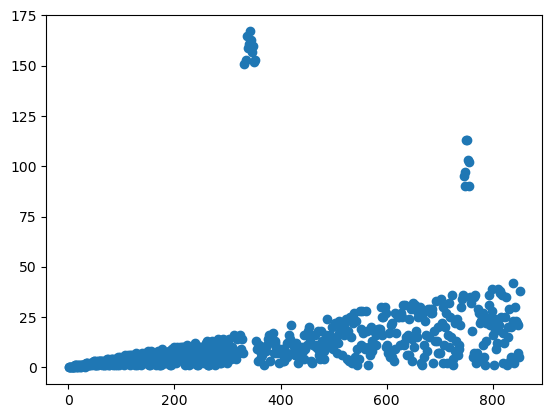

In [4]:
plt.scatter(df['Total Volume'], df['Total Fails'])


### CREATE CLUSTERS

In [5]:
# extract data
# # percent failed
# df['Failed'] = df['Total Fails']/df['Total Volume']

# total failed
data= df[['Total Fails', 'Total Volume']]

# data used in model
failed = data.values

failed_derived = (df['Total Fails']/df['Total Volume']).values.reshape(-1,1)

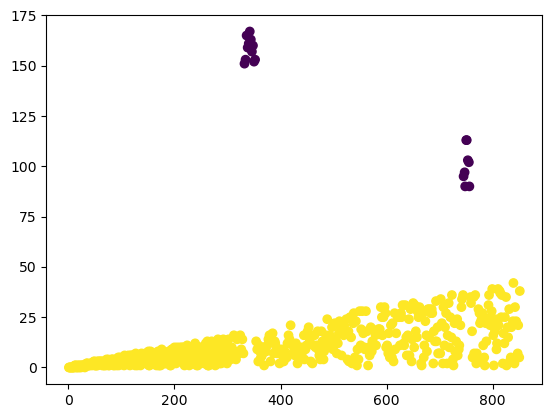

In [6]:
# isolation forest
import numpy as np
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest instance
clf = IsolationForest(contamination=0.03, random_state=42)  # 'contamination' is the expected fraction of outliers

# Fit the model on your data
clf.fit(failed)

# Predict outliers (1 for inliers, -1 for outliers)
predictions = clf.predict(failed)

# Print the predictions
# print(predictions)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

df["Labels"] = predictions


In [7]:
df.to_csv('../data/labelled_data.csv', index=False)

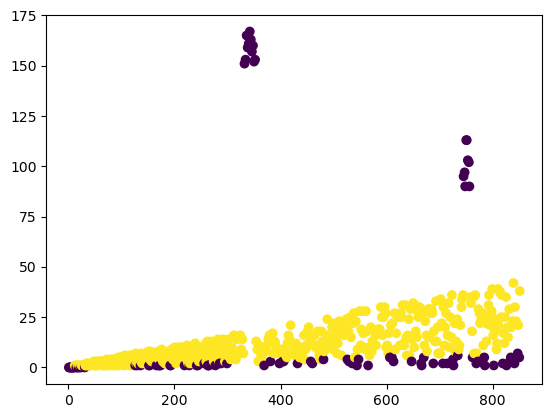

In [62]:
# One-class support vector machine
from sklearn import svm

# Fit a One-Class SVM
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma=0.003)
clf.fit(failed_derived)

predictions = clf.predict(failed_derived)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

# works better with the derived data than both features

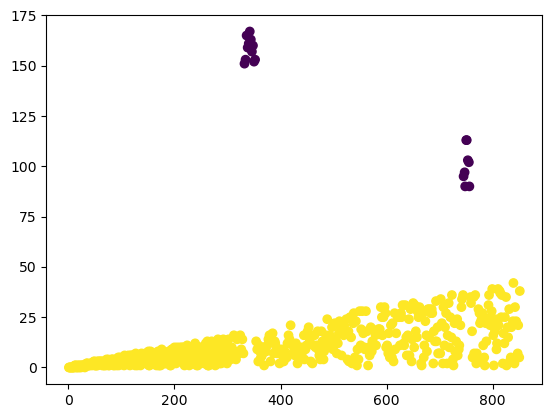

In [29]:
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)  # Adjust n_neighbors and contamination as needed

predictions = clf.fit_predict(failed)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

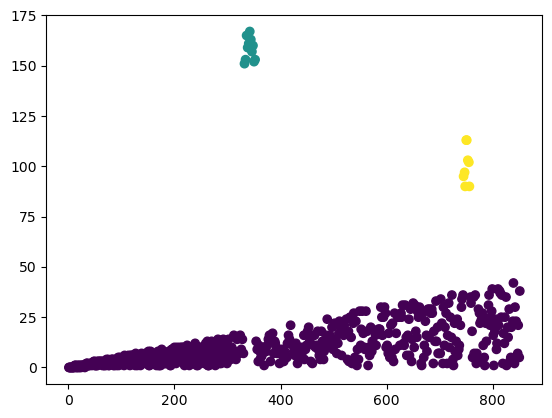

In [31]:
# dbscan
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=25, min_samples=6)

predictions = clf.fit_predict(failed)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

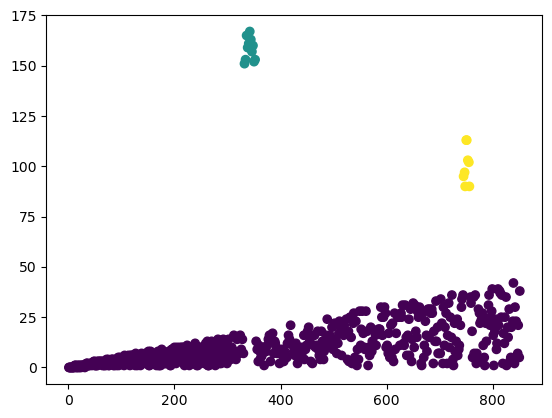

In [84]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering instance
clf = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=0.1)

predictions = clf.fit_predict(failed_derived)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

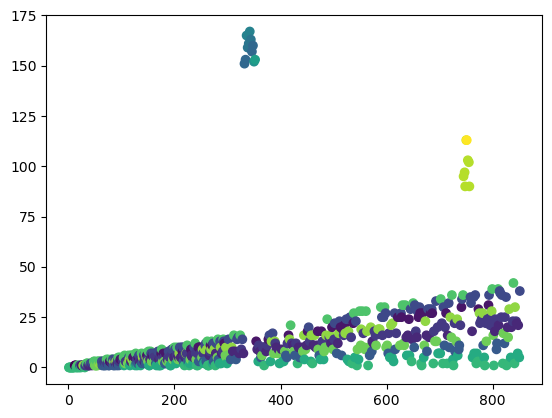

In [100]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation

# Create an AffinityPropagation instance
# super sensitive to damping
clf = AffinityPropagation(damping=0.9427, preference=None)

predictions = clf.fit_predict(failed_derived)

plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)

Epoch 1/500
16/16 [==============================] - 1s 11ms/step - loss: 0.2104 - val_loss: 0.2045
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1977 - val_loss: 0.1916
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1847 - val_loss: 0.1779
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1710 - val_loss: 0.1634
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1565 - val_loss: 0.1486
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1419 - val_loss: 0.1335
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.1272 - val_loss: 0.1187
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 0.1045
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0994 - val_loss: 0.0912
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0870 - val_loss: 0.0790
Epoch 11

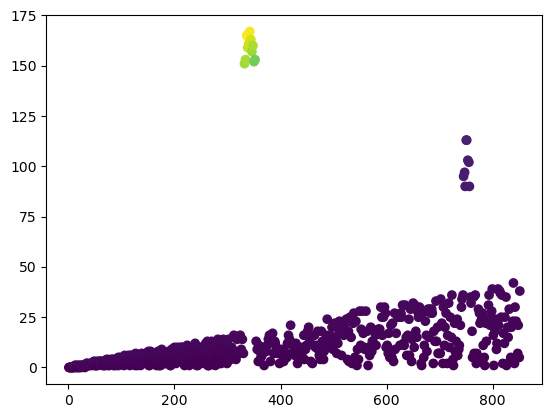

In [105]:
# autoencoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

data_shape = failed_derived.shape

# Create an autoencoder model
input_layer = Input(shape=data_shape)
encoded = Dense(25, activation='relu')(input_layer)  # Encoder
decoded = Dense(1, activation='sigmoid')(encoded)  # Decoder

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(failed_derived, failed_derived, epochs=500, batch_size=32, shuffle=True, validation_split=0.2)

# Encode and decode some data points
predictions = autoencoder.predict(failed_derived)


plt.scatter(df['Total Volume'], df['Total Fails'], c=predictions)
